In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
from sklearn.decomposition import PCA
import os
import imagesize

%matplotlib inline

In [2]:
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [14]:


data = pd.read_csv("defense_type_comparison.csv")

print("{} data".format(data.shape[0]))



24 data


# build_stateless_mean(bsm) VS build_aggregate_and_clip(bac)

In [4]:


data.head()



,round,test_metrics accuracy(bsm),test_metrics_target accuracy(bsm),loss1(bsm),loss2(bsm),test_metrics accuracy(bac),test_metrics_target accuracy(bac),loss1(bac),loss2(bac),norm_bound
0,0,0.2160,0.3765,2.2770,2.2555,0.120,0.933,2.290,2.24,0.15
1,5,0.8160,0.0150,0.5790,4.3120,0.533,0.111,2.180,2.23,0.15
2,10,0.8813,0.0390,0.3740,3.5000,0.662,0.120,1.910,2.25,0.15
3,15,0.9153,0.0660,0.2700,3.8800,0.726,0.069,1.495,2.44,0.15
4,20,0.9221,0.0662,0.2568,2.1700,0.762,0.078,1.055,2.72,0.15


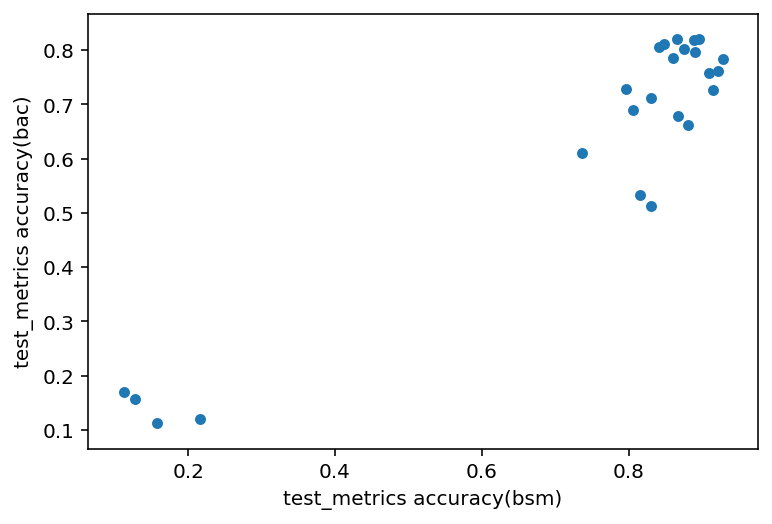

In [5]:
data.plot.scatter('test_metrics accuracy(bsm)','test_metrics accuracy(bac)')



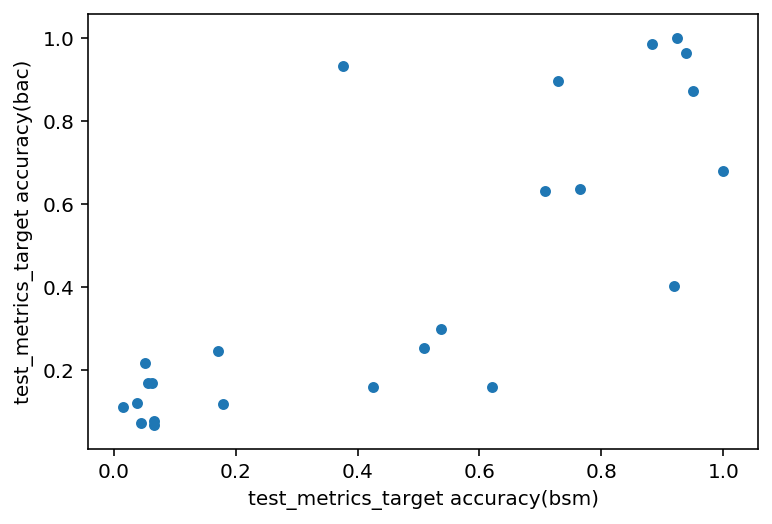

In [6]:

data.plot.scatter('test_metrics_target accuracy(bsm)','test_metrics_target accuracy(bac)')



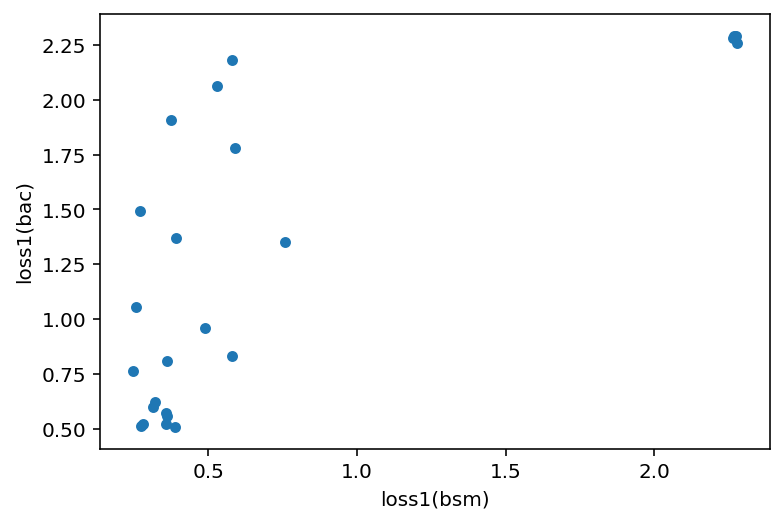

In [7]:

data.plot.scatter('loss1(bsm)','loss1(bac)')



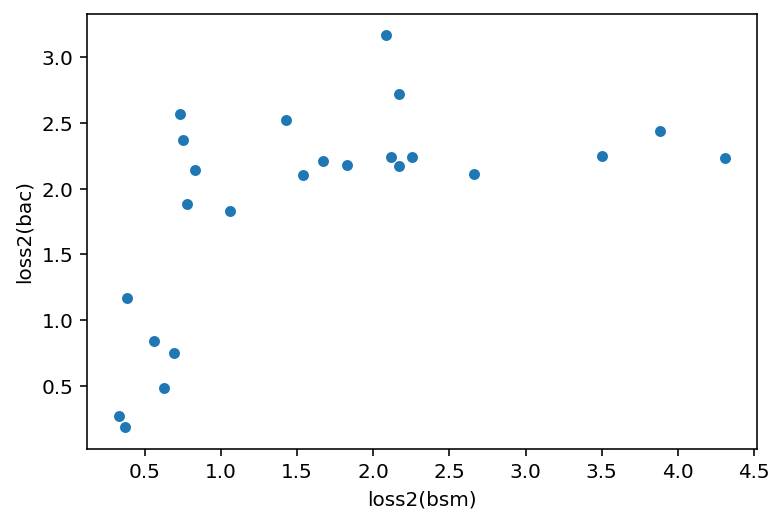

In [8]:


data.plot.scatter('loss2(bsm)','loss2(bac)')



In [15]:
data['norm_bound']

0     0.15
1     0.15
2     0.15
3     0.15
4     0.15
5     0.15
6     0.33
7     0.33
8     0.33
9     0.33
10    0.33
11    0.33
12    0.25
13    0.25
14    0.25
15    0.25
16    0.25
17    0.25
18    0.50
19    0.50
20    0.50
21    0.50
22    0.50
23    0.50
Name: norm_bound, dtype: float64

#WHEN NORM_BOUND = 0.33

In [37]:
X = data
X = X.drop(data[data['norm_bound'] !=0.33].index)

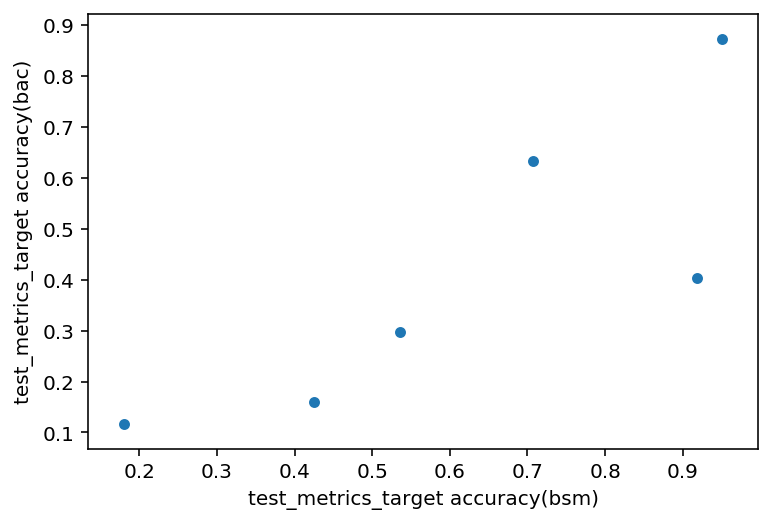

In [32]:
X.plot.scatter('test_metrics_target accuracy(bsm)','test_metrics_target accuracy(bac)')


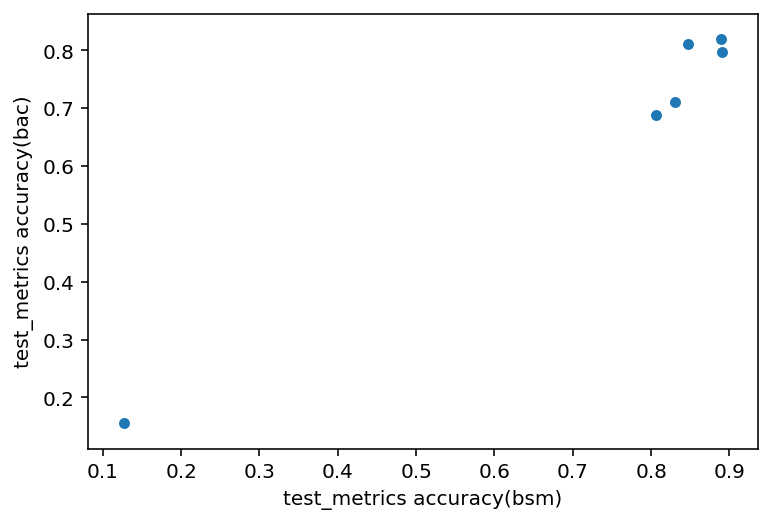

In [33]:
X.plot.scatter('test_metrics accuracy(bsm)','test_metrics accuracy(bac)')


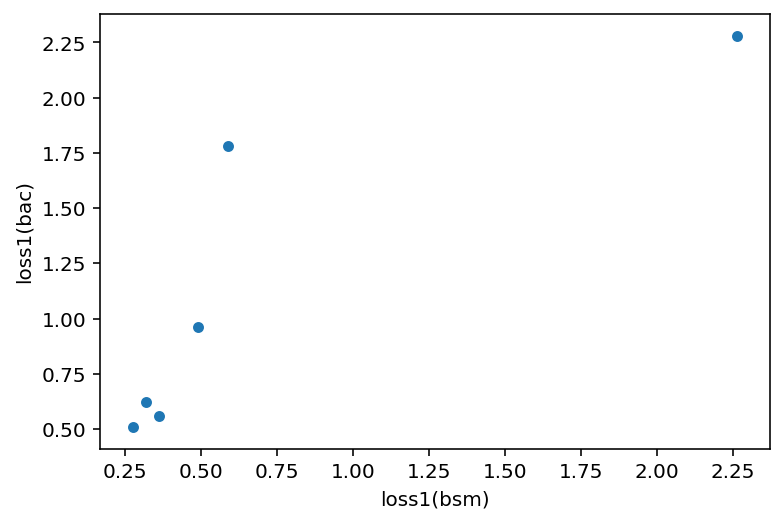

In [35]:
X.plot.scatter('loss1(bsm)','loss1(bac)')


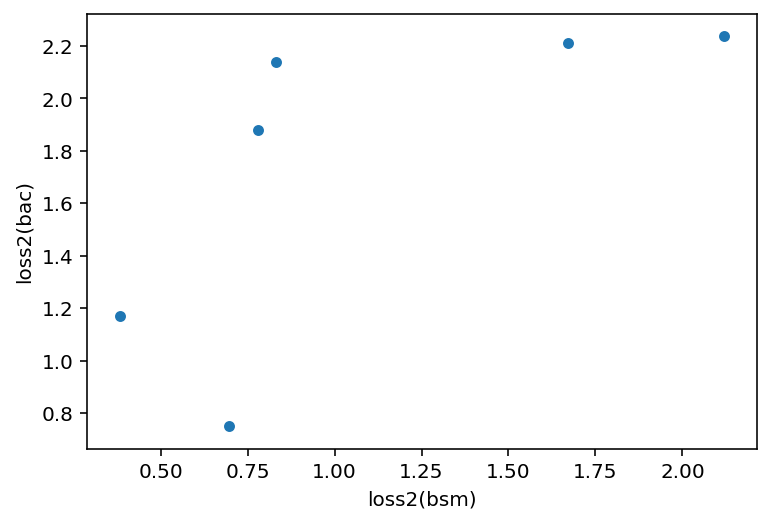

In [36]:
X.plot.scatter('loss2(bsm)','loss2(bac)')


#WHEN NORM_BOUND = 0.15

In [40]:
X = data
X = X.drop(data[data['norm_bound'] !=0.15].index)


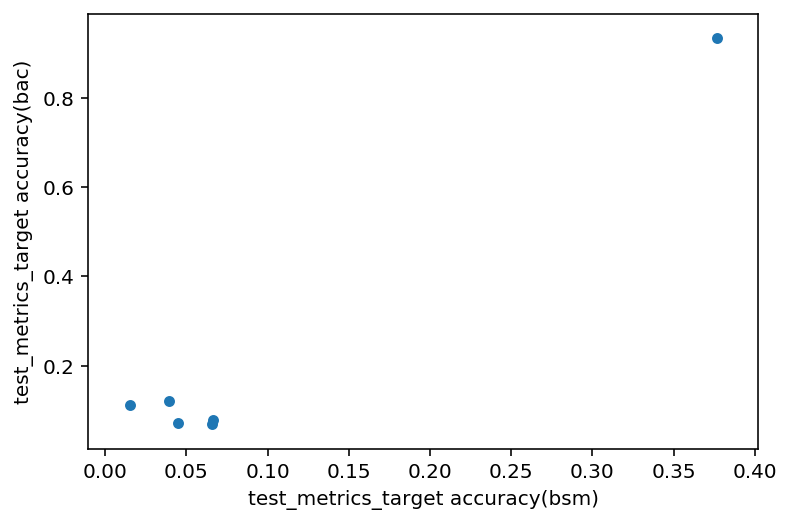

In [41]:
X.plot.scatter('test_metrics_target accuracy(bsm)','test_metrics_target accuracy(bac)')


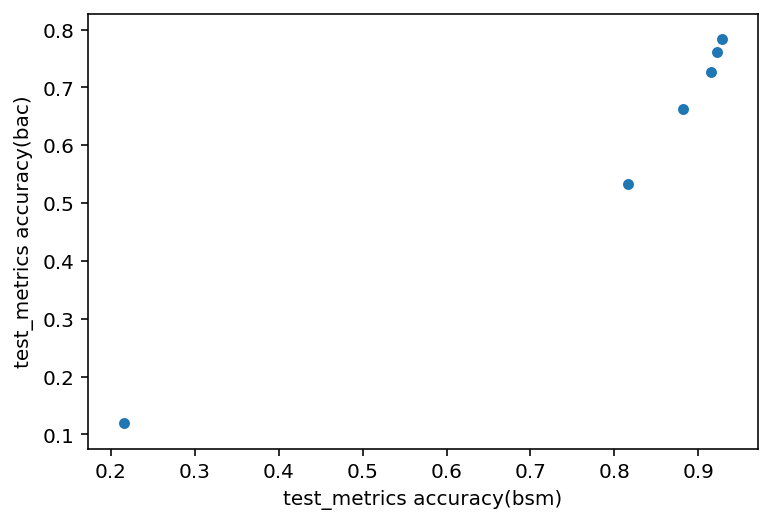

In [42]:
X.plot.scatter('test_metrics accuracy(bsm)','test_metrics accuracy(bac)')


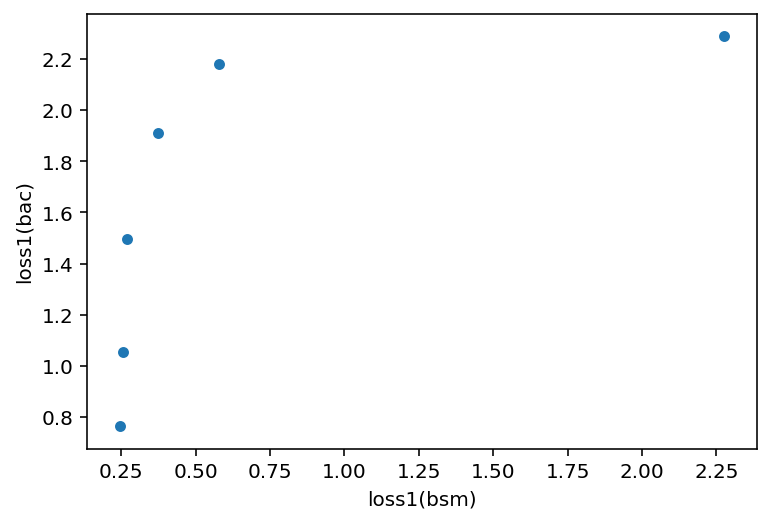

In [44]:
X.plot.scatter('loss1(bsm)','loss1(bac)')


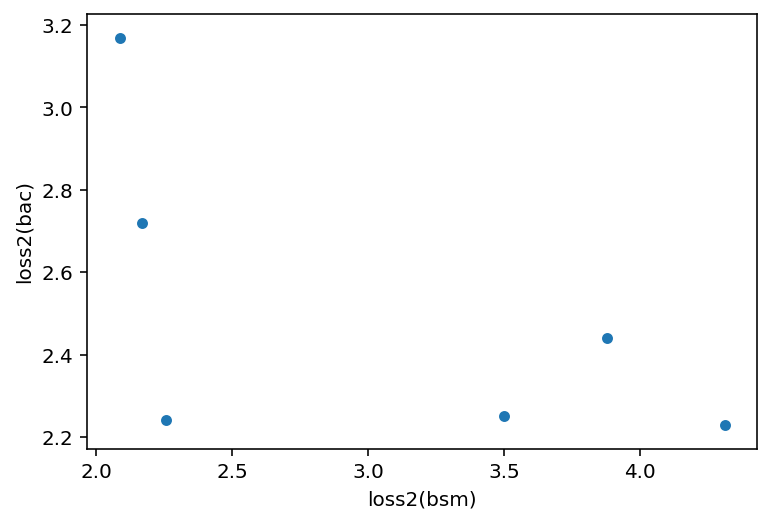

In [45]:
X.plot.scatter('loss2(bsm)','loss2(bac)')


#WHEN NORM_BOUND = 0.25

In [46]:
X = data
X = X.drop(data[data['norm_bound'] !=0.25].index)


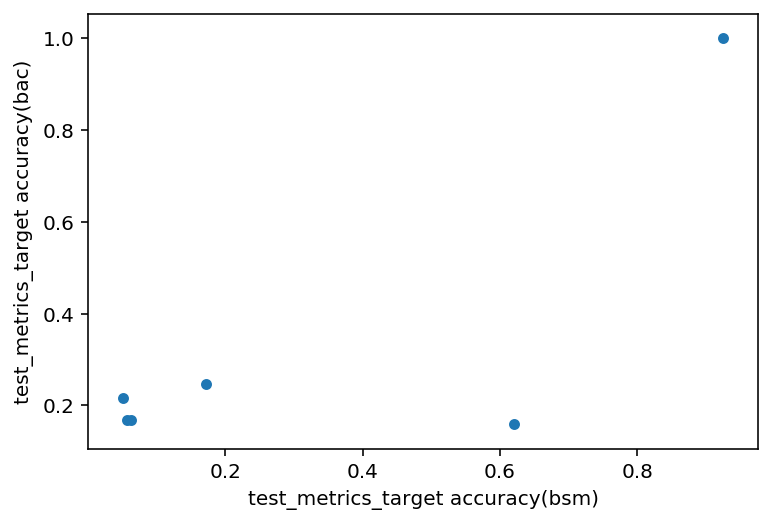

In [47]:
X.plot.scatter('test_metrics_target accuracy(bsm)','test_metrics_target accuracy(bac)')


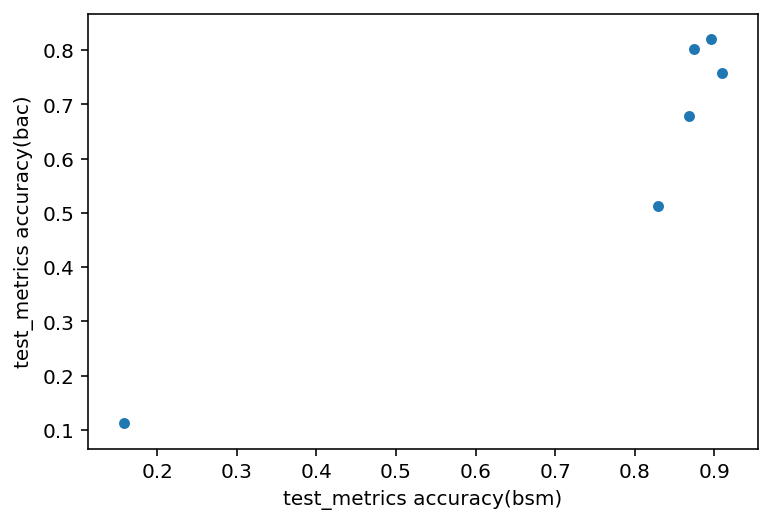

In [49]:
X.plot.scatter('test_metrics accuracy(bsm)','test_metrics accuracy(bac)')


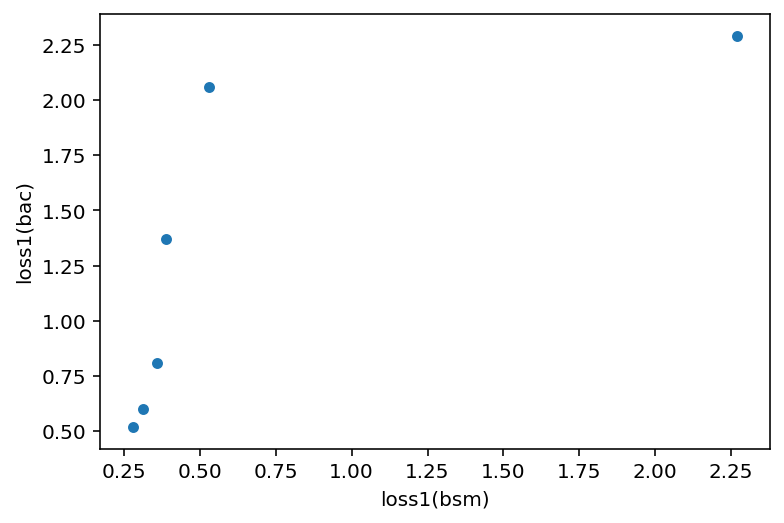

In [50]:
X.plot.scatter('loss1(bsm)','loss1(bac)')


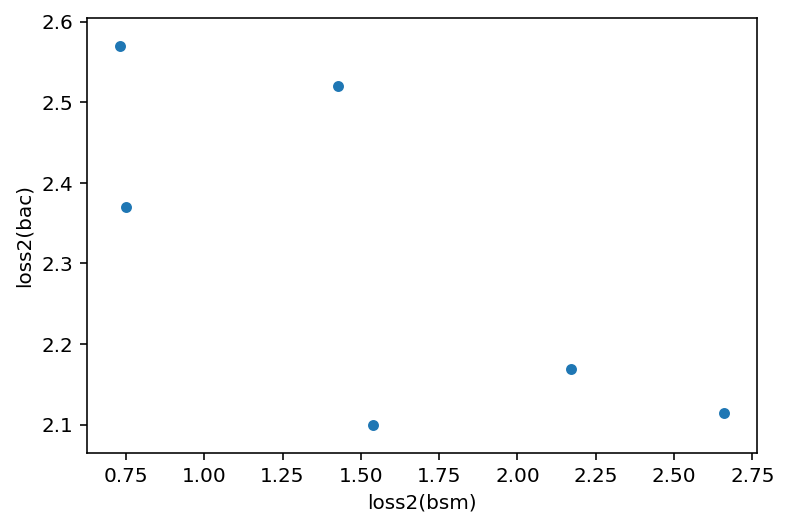

In [51]:
X.plot.scatter('loss2(bsm)','loss2(bac)')


#WHEN NORM_BOUND = 0.5

In [52]:
X = data
X = X.drop(data[data['norm_bound'] !=0.5].index)


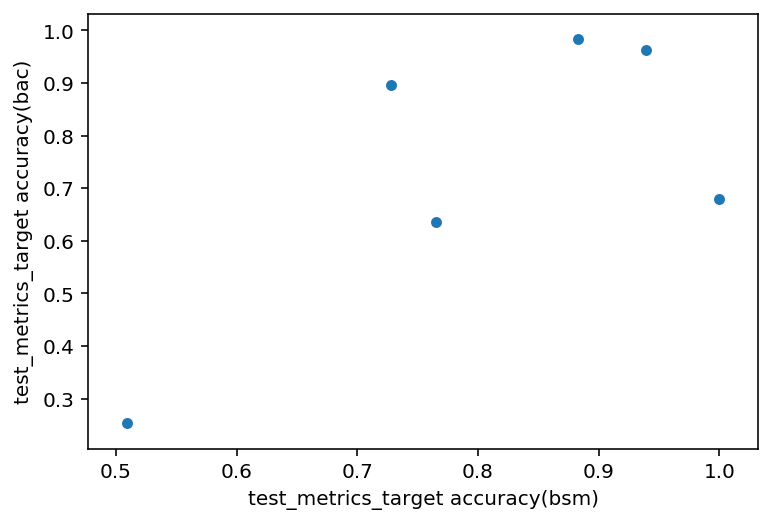

In [53]:
X.plot.scatter('test_metrics_target accuracy(bsm)','test_metrics_target accuracy(bac)')


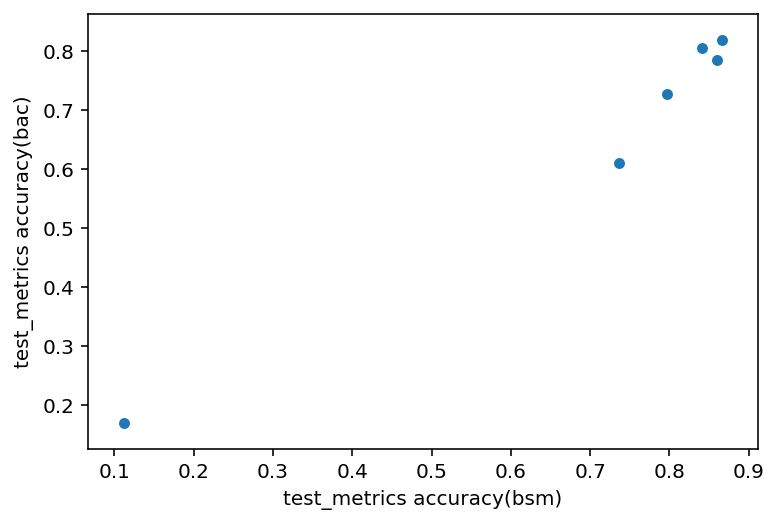

In [54]:
X.plot.scatter('test_metrics accuracy(bsm)','test_metrics accuracy(bac)')


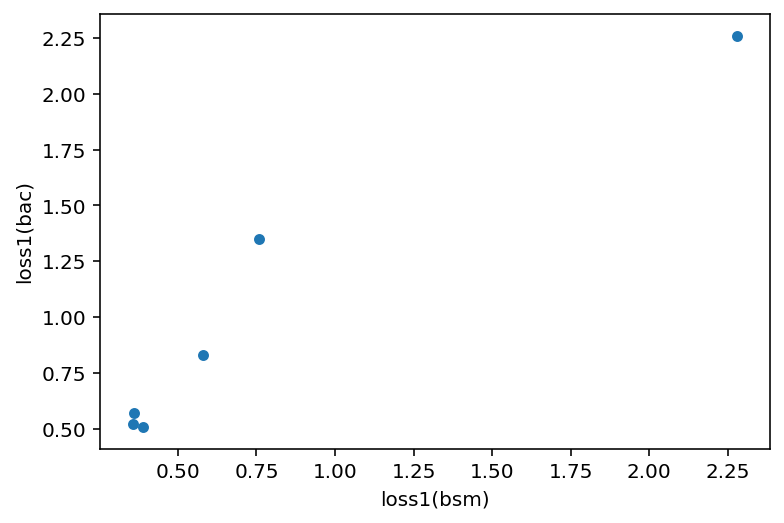

In [55]:
X.plot.scatter('loss1(bsm)','loss1(bac)')


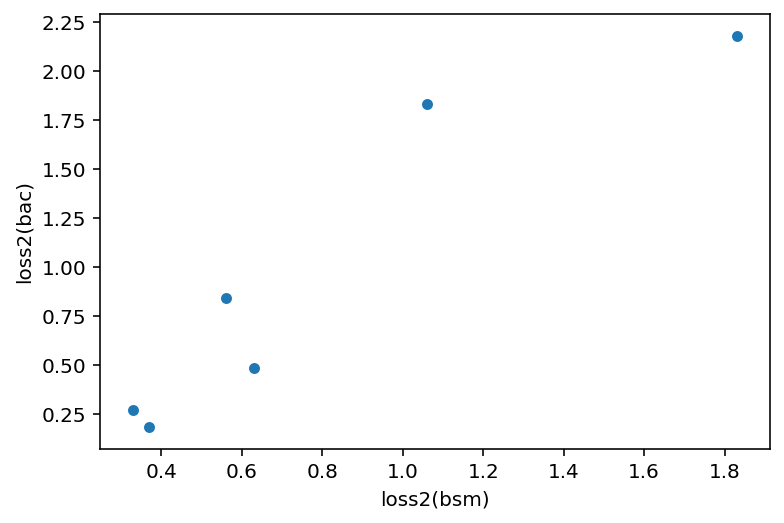

In [56]:
X.plot.scatter('loss2(bsm)','loss2(bac)')
